In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets
import sys

In [2]:
# Verificar las versiones de las librerías
import sklearn
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(plt.matplotlib.__version__))
print('sys: {}'.format(sys.version_info))

Python: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]
Pandas: 2.2.3
Numpy: 2.2.3
Seaborn: 0.13.2
Scikit-learn: 1.6.1
Matplotlib: 3.10.0
sys: sys.version_info(major=3, minor=12, micro=9, releaselevel='final', serial=0)


In [3]:
# Carga y exploración de datos
iris = datasets.load_iris()

# Convertir Dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

# Mapeo de etiquetas numéricas
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\Javier\AppData\Local\Temp\ipykernel_11092\2852588281.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='viridis')


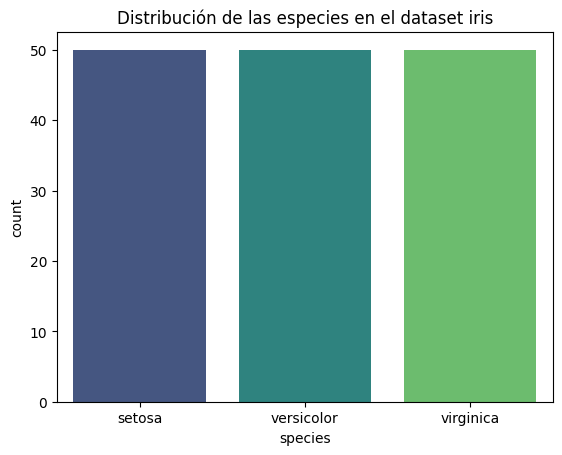

In [4]:
# Información general del dataset
df.info()

# Resumen estadístico
df.describe()

# Comprobación de valores
df.isnull().sum()

# VIsualización de la distribución de clases
sns.countplot(x='species', data=df, palette='viridis')
plt.title('Distribución de las especies en el dataset iris')
plt.show()

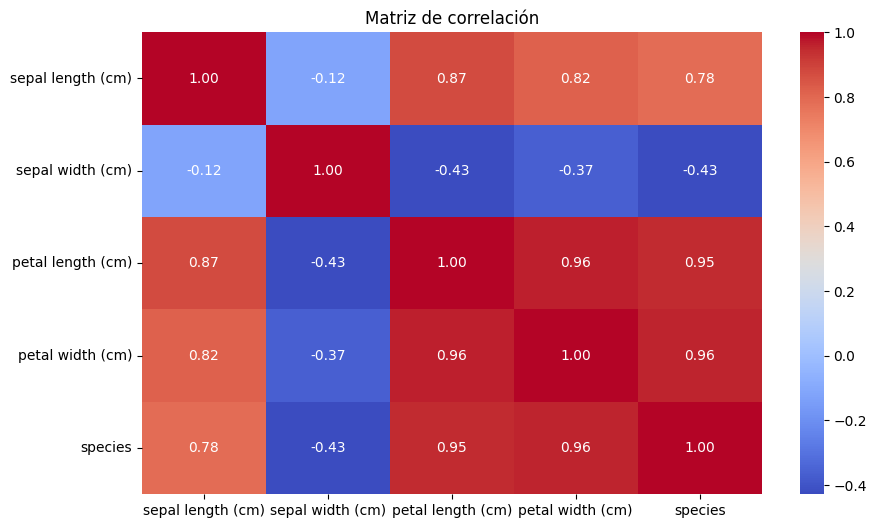

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convertir la columna 'species' a valores numéricos
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

In [6]:
# Separar las características (x) y variable objetivo (y)
x = df.drop(columns=['species'])
y = df['species']

# División en conjuntos de entrenamiento y prueba (80% - 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
# Normalización de los datos
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

Precisión del Random Forest: 1.0000



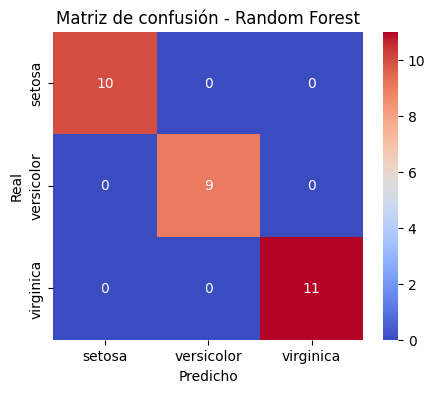

Reporte de clasificación del Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precisión del K-Nearest Neighbors: 1.0000



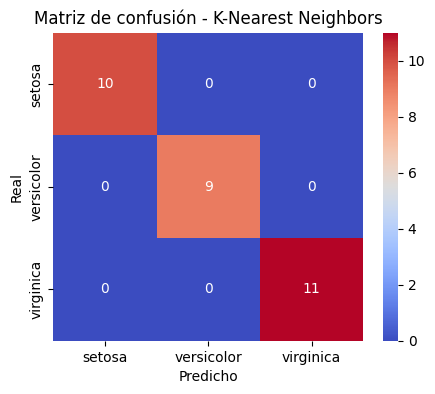

Reporte de clasificación del K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Precisión del Support Vector Machine: 1.0000



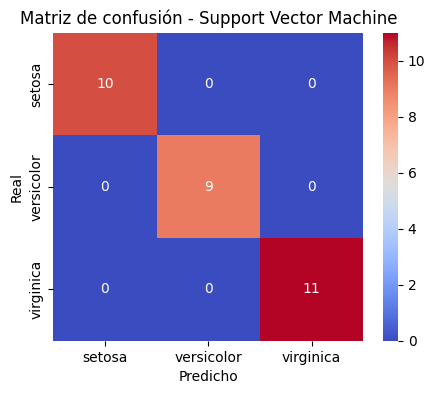

Reporte de clasificación del Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




In [8]:
# Definimos una función para entrenar y evaluar los modelos
def train_and_evaluate(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Evaluación del modelo
    acc = accuracy_score(y_test, y_pred)
    print(f'Precisión del {model_name}: {acc:.4f}\n')
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title(f'Matriz de confusión - {model_name}')
    plt.show()
    
    # Reporte de clasificación
    class_report = classification_report(y_test, y_pred)
    print(f'Reporte de clasificación del {model_name}:\n{class_report}\n')
    
# Modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(random_state=42),
}

# Entrenameinto y evaluación
for model_name, model in models.items():
    train_and_evaluate(model, x_train, y_train, x_test, y_test, model_name=model_name)    

In [9]:
# Comparación de la precisión
accuracies = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc

C:\Users\Javier\AppData\Local\Temp\ipykernel_11092\1849972157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')


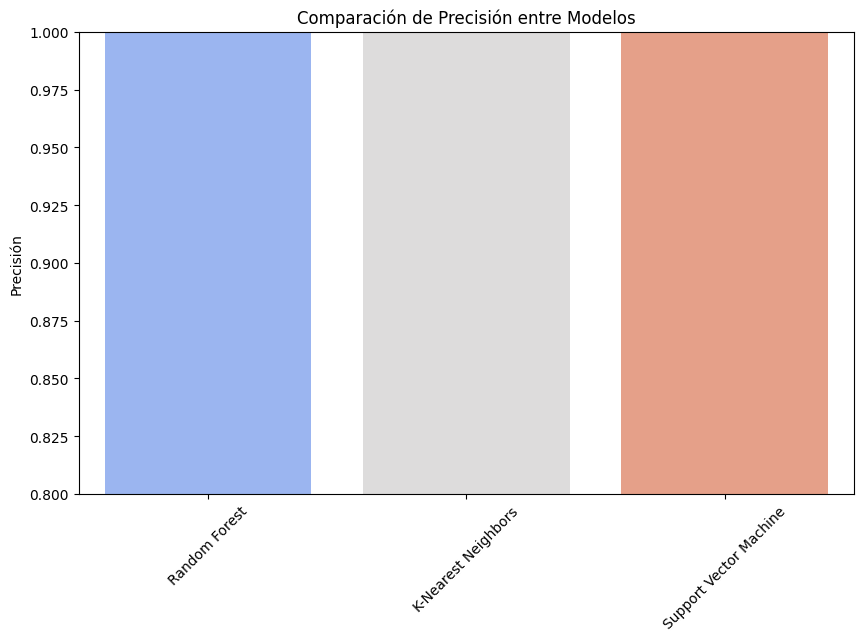

In [11]:
# Visualización de la práctica
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')
plt.ylim(0.8, 1)
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre Modelos')
plt.xticks(rotation=45)
plt.show()